In [5]:
import pandas as pd
import numpy as np
import random

In [6]:
from gridworld.tasks.task import Subtasks, Task, Tasks
from gridworld.data import IGLUDataset
dataset = IGLUDataset(dataset_version='v0.1.0-rc1') 

In [7]:
def extract_task_dialog(task_key: str) -> list:
    task_id = "c" + extract_task_ids(task_key)[0]
    session_id = int(extract_task_ids(task_key)[1])
    subtask_id = int(extract_task_ids(task_key)[2])
   
    return gridworld_dataset.tasks[task_id][session_id].dialog[subtask_id]

def extract_task_ids(task_key: str) -> list:
    return re.sub("[()''c]", "", task_key).split(",")

In [8]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

# plot_grid src:  https://gitlab.aicrowd.com/aicrowd/challenges/iglu-challenge-2022/iglu-2022-rl-mhb-baseline/-/blob/master/agents/mhb_baseline/nlp_model/utils.py
def plot_grid(voxel: np.ndarray, text: str = None) -> plt.figure:
    idx2color = {1: 'blue', 2: 'green', 3: 'red', 4: 'orange', 5: 'purple', 6: 'yellow'}
    vox = voxel.transpose(1, 2, 0)
    colors = np.empty(vox.shape, dtype=object)
    for i in range(vox.shape[0]):
        for j in range(vox.shape[1]):
            for k in range(vox.shape[2]):
                if vox[i, j, k] != 0:
                    colors[i][j][k] = str(idx2color[vox[i, j, k]])
    
    fig = plt.figure(figsize=(6,6), dpi=200)
    ax = fig.add_subplot(projection='3d', )
    ax.voxels(vox, facecolors=colors, edgecolor='k', )

    ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=11))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=11))
    ax.zaxis.set_major_locator(MaxNLocator(integer=True, nbins=9))
    ax.set_xticks(np.arange(0, 12, 1), minor=True)
    ax.set_yticks(np.arange(0, 12, 1), minor=True)
    ax.set_zticks(np.arange(0, 9, 1), minor=True)

    box = ax.get_position()
    box.x0 = box.x0 - 0.05
    box.x1 = box.x1 - 0.05
    box.y1 = box.y1 + 0.16
    box.y0 = box.y0 + 0.16
    ax.set_position(box)

    if text is not None:
        plt.annotate(text, (0, 0), (0, -20), xycoords='axes fraction', textcoords='offset points',
            verticalalignment='top', wrap=True)
    return fig

In [9]:
for key_id in [key for key in dataset.tasks.keys()]:
    print(key_id, len(dataset.tasks[key_id][0].structure_seq))

c118 1
c120 1
c126 1
c127 1
c139 1
c18 1
c29 1
c36 1
c92 10
c96 8
c97 1
c135 1
c136 1
c27 7
c33 10
c73 9
c71 1
c72 2
c74 4
c75 1
c77 2
c78 1
c51 9
c54 8
c55 1
c57 7
c58 8
c59 10
c76 1
c69 2
c116 1


# Displaying subtask structures

In [134]:
target = np.abs(Tasks.to_dense(dataset.tasks[task_id][session_id].structure_seq[subtask_id - 1]) - Tasks.to_dense(dataset.tasks[task_id][session_id].structure_seq[subtask_id]))
(target != 0).sum().item()

1

In [122]:
def show_subtask_with_dialog(task_id: str, session_id: int, subtask_id: int, full_build: bool = True) -> None:
    if subtask_id > 0 and not full_build:
        # TODO: Ha block replacement van, akkor elronthatja a színeket!
        # IMPORTANT: Nem biztos. "Blocks to remove have negative ids."
        # https://gitlab.aicrowd.com/aicrowd/challenges/iglu-challenge-2022/iglu-2022-rl-mhb-baseline/-/blob/master/evaluator/iglu_evaluator.py
        grid = np.abs(Tasks.to_dense(dataset.tasks[task_id][session_id].structure_seq[subtask_id - 1]) - Tasks.to_dense(dataset.tasks[task_id][session_id].structure_seq[subtask_id]))
    else:   
        grid = Tasks.to_dense(dataset.tasks[task_id][session_id].structure_seq[subtask_id])
    
    plot_grid(grid, dataset.tasks[task_id][session_id].dialog[subtask_id])

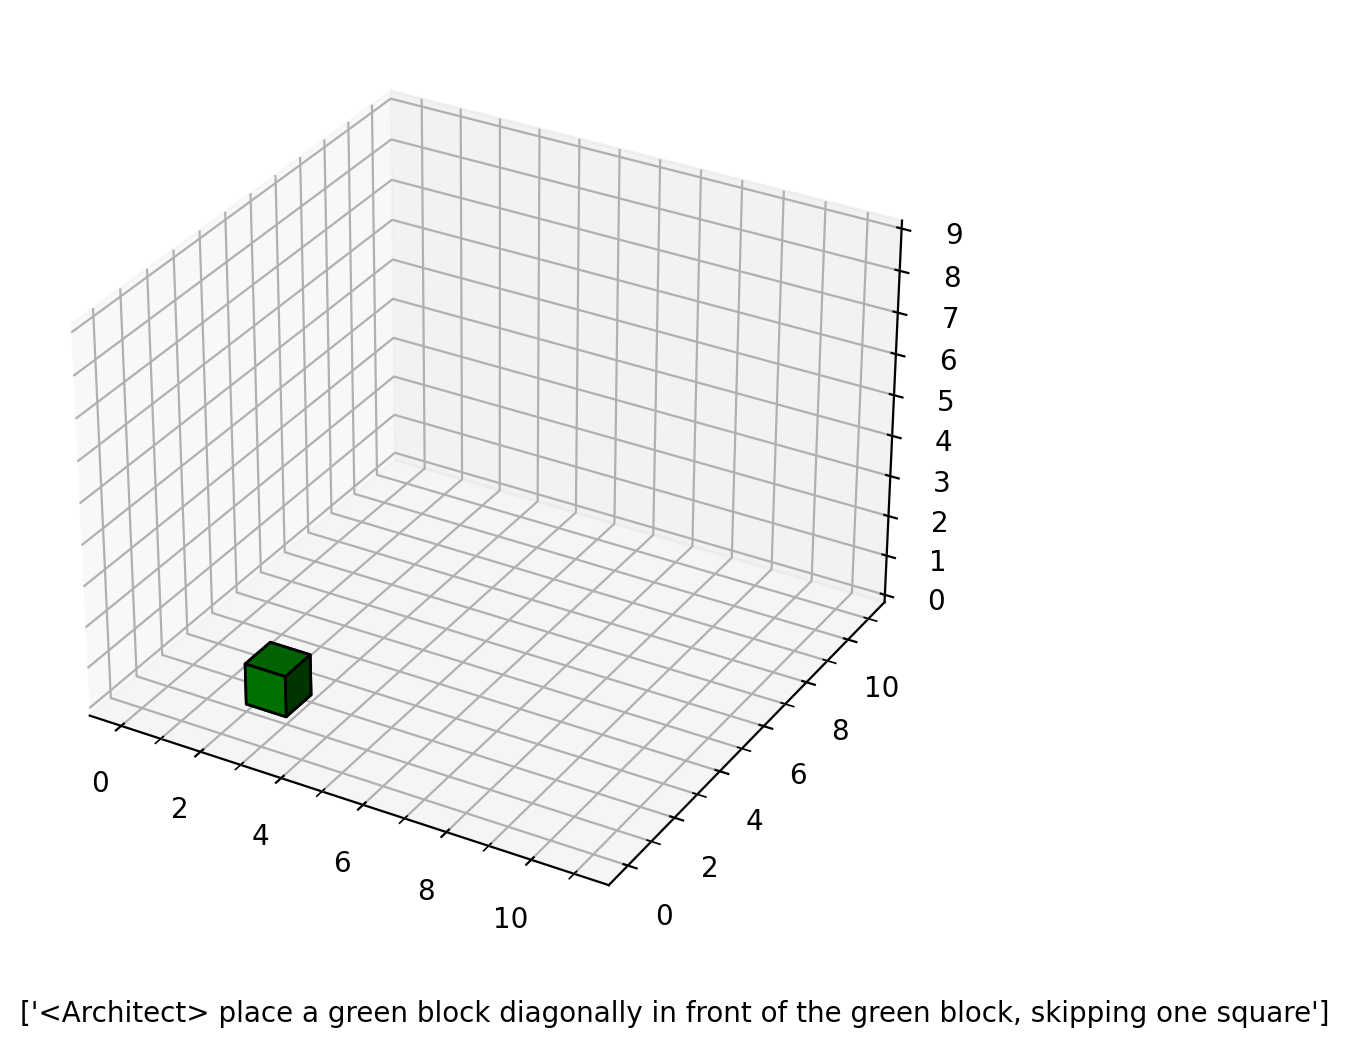

In [121]:
show_subtask_with_dialog('c116', 2, 3, False)

In [135]:
data_utterances = []
data_grids = []
data_grids_flat = []
data_target_size = []

for task_id, task in dataset.tasks.items():
    for session_id, session in enumerate(task):
        starting_grid = []
        for subtask_id, subtask in enumerate(session.structure_seq):
            utterance = ' '.join(dataset.tasks[task_id][session_id].dialog[subtask_id])
            grid = np.abs(Tasks.to_dense(subtask) - Tasks.to_dense(starting_grid))
            starting_grid = subtask
            
            data_target_size.append((grid != 0).sum().item())
            data_utterances.append(utterance)
            data_grids.append(grid)
            data_grids_flat.append(np.ravel(grid))
            
            # TODO: Performance optimization for larger data!

In [157]:
# temp_id = 45
# print(data_target_size[temp_id], data_utterances[temp_id])
# plot_grid(data_grids[temp_id])

In [13]:
data_grids_nocolor = np.copy(data_grids)
data_grids_nocolor[data_grids_nocolor != 0] = 1

data_grids_nocolor_flat = np.copy(data_grids_flat)
data_grids_nocolor_flat[data_grids_nocolor_flat != 0] = 1

In [14]:
# soronként X, Y, Z komponensei a nem nulla elemet tartalmazó koordinátáknak 
coords_array = np.nonzero(data_grids_nocolor)[1:]
#coords_array = np.nonzero(data_grids)[1:]

(array([[488., 347., 257., 220., 135.,  67.,  36.,  18.,   7.,   0.],
        [ 59.,  72., 108., 178., 307., 380., 262.,  78.,  39.,  92.],
        [ 58.,  24.,  44.,  89., 224., 525., 416., 105.,  33.,  57.]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 3 BarContainer objects>)

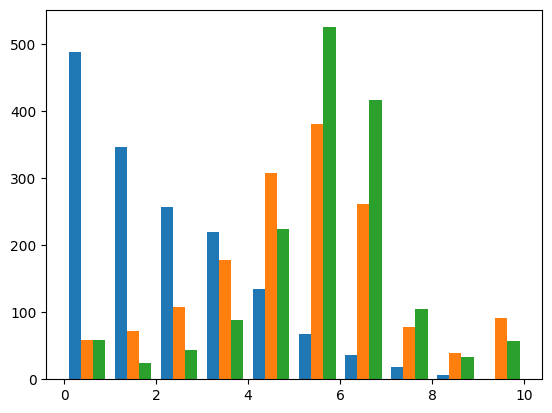

In [15]:
plt.hist(coords_array)

# BERT Baseline Training

In [16]:
pretty_print = lambda x: np.format_float_positional(x, trim="-")

In [17]:
import torch.nn as nn
import torch

In [18]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
encoded_corpus = tokenizer(text=data_utterances,
                            add_special_tokens=True,
                            padding='max_length',
                            truncation='longest_first',
                            max_length=512,
                            return_attention_mask=True)

input_ids = encoded_corpus['input_ids']
attention_mask = encoded_corpus['attention_mask']
labels = data_grids_flat

In [19]:
labels = nn.functional.one_hot(torch.Tensor(labels).to(torch.int64))

In [22]:
labels.shape

torch.Size([584, 1089, 7])

In [23]:
labels = torch.flatten(labels, start_dim=1)

In [166]:
# Ez a fenti kodreszlet, miert is kell?

In [169]:
data_grids[0].shape

(9, 11, 11)

In [31]:
from sklearn.model_selection import train_test_split

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10
seed_val = 42

train_masks, test_masks, _, _ = train_test_split(attention_mask, labels, test_size=1-train_ratio, random_state=seed_val)
train_inputs, test_inputs, train_labels, test_labels = train_test_split(input_ids, labels, test_size=1-train_ratio, random_state=seed_val)

val_masks, test_masks, _, _ = train_test_split(test_masks, test_labels, test_size=test_ratio/(test_ratio + validation_ratio), random_state=seed_val)
val_inputs, test_inputs, val_labels, test_labels = train_test_split(test_inputs, test_labels, test_size=test_ratio/(test_ratio + validation_ratio), random_state=seed_val)

In [ ]:
train_grids_nooh, test_grids_nooh = train_test_split(data_grids, labels, test_size=1-train_ratio, random_state=seed_val)

In [33]:
print(len(train_inputs), len(val_inputs), len(test_inputs))

438 87 59


In [35]:
import torch
from torch.utils.data import TensorDataset, DataLoader

batch_size = 4

def create_dataloaders(inputs, masks, labels, batch_size):
    input_tensor = torch.tensor(inputs)
    mask_tensor = torch.tensor(masks)
    labels_tensor = torch.tensor(labels)
    dataset = TensorDataset(input_tensor, mask_tensor, labels_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataloader

train_dataloader = create_dataloaders(train_inputs, train_masks, train_labels, batch_size)
validation_dataloader = create_dataloaders(val_inputs, val_masks, val_labels, batch_size)
test_dataloader = create_dataloaders(test_inputs, test_masks, test_labels, batch_size)

/tmp/ipykernel_2155709/1549525928.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels_tensor = torch.tensor(labels)


In [36]:
import torch.nn as nn
from transformers import AutoModel

class BertMultiClassifier(nn.Module):
    
    def __init__(self, drop_rate=0.2, freeze_bert=False):
        
        super(BertMultiClassifier, self).__init__()
        # with colors
        D_in, D_out = 768, 9*11*11*7
        # without colors
        #D_in, D_out = 768, 9*11*11*2
        
        self.bert = AutoModel.from_pretrained("bert-base-cased")
        self.multiclassifier = nn.Sequential(nn.Dropout(drop_rate), nn.Linear(D_in, D_out))
        
    def forward(self, input_ids, attention_masks):
        
        outputs = self.bert(input_ids, attention_masks)
        bert_output = outputs[1]
        outputs = self.multiclassifier(bert_output)
        
        return outputs

model = BertMultiClassifier(drop_rate=0.2)

In [37]:
import torch

if torch.cuda.is_available():       
    print("Using GPU.")
    device = torch.device("cuda")
else:
    print("No GPU available, using the CPU instead.")
    device = torch.device("cpu")

model.to(device)

Using GPU.


BertMultiClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affin

In [38]:
from transformers import AdamW
optimizer = AdamW(model.parameters(), lr=5e-5, eps=1e-8)

In [44]:
from transformers import get_linear_schedule_with_warmup

epochs = 10
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

In [45]:
loss_function = nn.BCEWithLogitsLoss()

In [46]:
# https://medium.com/ilb-labs-publications/fine-tuning-bert-for-a-regression-task-is-a-description-enough-to-predict-a-propertys-list-price-cf97cd7cb98a
# https://mccormickml.com/2019/07/22/BERT-fine-tuning/#43-training-loop

In [47]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [56]:
from torch.nn.utils.clip_grad import clip_grad_norm

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()


def train(model, optimizer, scheduler, loss_function, epochs, train_dataloader, device, clip_value=2):
    for epoch_i in range(epochs):
        print("")
        print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
        print('Training...')

        # Measure how long the training epoch takes.
        t0 = time.time()

        # Reset the total loss for this epoch.
        total_train_loss = 0
        
        best_loss = 1e10
        
        model.train()
        
        for step, batch in enumerate(train_dataloader): 
            if step % 40 == 0 and not step == 0:
                # Calculate elapsed time in minutes.
                elapsed = format_time(time.time() - t0)
                # Report progress.
                print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}    Loss:{:}.'.format(step, len(train_dataloader), elapsed, total_train_loss / len(train_dataloader)))
            
            batch_inputs, batch_masks, batch_labels = tuple(b.to(device) for b in batch)
            model.zero_grad()
            outputs = model(batch_inputs, batch_masks)
            
            # with color: [9, 11, 11, 2]
            outputs = torch.reshape(outputs.squeeze(), (len(batch_inputs), 9, 11, 11, 7))
            batch_labels = torch.reshape(batch_labels.squeeze(), (len(batch_labels), 9, 11, 11, 7))
            # meg nem feltetlen jok a dimenziok, batch size?
            
            loss = loss_function(outputs.to(torch.float64), batch_labels.to(torch.float64))
            
            #loss = loss_function(outputs.squeeze().to(torch.float64), batch_labels.squeeze().to(torch.float64))
            total_train_loss += loss.item()
            loss.backward()
            
            clip_grad_norm(model.parameters(), clip_value)
            optimizer.step()
            scheduler.step()
            
        # Calculate the average loss over all of the batches.
        avg_train_loss = total_train_loss / len(train_dataloader)            

        # Measure how long this epoch took.
        training_time = format_time(time.time() - t0)
        
        print("")
        print("  Average training loss: {0:.2f}".format(avg_train_loss))
        print("  Training epcoh took: {:}".format(training_time))
        
        print("")
        print("Running Validation...")

        t0 = time.time()

        # Put the model in evaluation mode--the dropout layers behave differently
        # during evaluation.
        model.eval()

        # Tracking variables 
        total_eval_accuracy = 0
        total_eval_loss = 0
        nb_eval_steps = 0

        # Evaluate data for one epoch
        for batch in validation_dataloader:

            # Unpack this training batch from our dataloader. 
            #
            # As we unpack the batch, we'll also copy each tensor to the GPU using 
            # the `to` method.
            #
            # `batch` contains three pytorch tensors:
            #   [0]: input ids 
            #   [1]: attention masks
            #   [2]: labels 
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            # Tell pytorch not to bother with constructing the compute graph during
            # the forward pass, since this is only needed for backprop (training).
            with torch.no_grad():        

                # Forward pass, calculate logit predictions.
                # token_type_ids is the same as the "segment ids", which 
                # differentiates sentence 1 and 2 in 2-sentence tasks.
                # The documentation for this `model` function is here: 
                # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
                # Get the "logits" output by the model. The "logits" are the output
                # values prior to applying an activation function like the softmax.
                outputs = model(b_input_ids, b_input_mask)

                # with color: [9, 11, 11, 2]
                outputs_reshaped = torch.reshape(outputs.squeeze(), (len(b_input_ids), 9, 11, 11, 7))
                batch_labels = torch.reshape(b_labels.squeeze(), (len(b_labels), 9, 11, 11, 7))
                # meg nem feltetlen jok a dimenziok, batch size?

                loss = loss_function(outputs_reshaped.to(torch.float64), batch_labels.to(torch.float64))
                
            # Accumulate the validation loss.
            total_eval_loss += loss.item()

#             # Move logits and labels to CPU
#             logits = logits.detach().cpu().numpy()
#             label_ids = b_labels.to('cpu').numpy()

#             # Calculate the accuracy for this batch of test sentences, and
#             # accumulate it over all batches.
#             total_eval_accuracy += flat_accuracy(logits, label_ids)


        # Report the final accuracy for this validation run.
        # avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
        # print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

        # Calculate the average loss over all of the batches.
        avg_val_loss = total_eval_loss / len(validation_dataloader)

        # Measure how long the validation run took.
        validation_time = format_time(time.time() - t0)

        print("  Validation Loss: {0:.2f}".format(avg_val_loss))
        print("  Validation took: {:}".format(validation_time))

        # Record all statistics from this epoch.
        training_stats.append(
            {
                'epoch': epoch_i + 1,
                'Training Loss': avg_train_loss,
                'Valid. Loss': avg_val_loss,
                'Training Time': training_time,
                'Validation Time': validation_time
            }
        )

    print("")
    print("Training complete!")

    print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
            
    return model

model = train(model, optimizer, scheduler, loss_function, epochs, train_dataloader, device, clip_value=2)


======== Epoch 1 / 10 ========
Training...


/tmp/ipykernel_2155709/4005517804.py:54: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  clip_grad_norm(model.parameters(), clip_value)


  Batch    40  of    110.    Elapsed: 0:00:08    Loss:0.003706799862904006.
  Batch    80  of    110.    Elapsed: 0:00:17    Loss:0.00726127122272155.

  Average training loss: 0.01
  Training epcoh took: 0:00:23

Running Validation...
  Validation Loss: 0.01
  Validation took: 0:00:01

======== Epoch 2 / 10 ========
Training...
  Batch    40  of    110.    Elapsed: 0:00:08    Loss:0.003330898720346409.
  Batch    80  of    110.    Elapsed: 0:00:17    Loss:0.00685463443955315.

  Average training loss: 0.01
  Training epcoh took: 0:00:23

Running Validation...
  Validation Loss: 0.01
  Validation took: 0:00:01

======== Epoch 3 / 10 ========
Training...
  Batch    40  of    110.    Elapsed: 0:00:08    Loss:0.003320047613950271.
  Batch    80  of    110.    Elapsed: 0:00:17    Loss:0.00661109151699469.

  Average training loss: 0.01
  Training epcoh took: 0:00:23

Running Validation...
  Validation Loss: 0.01
  Validation took: 0:00:01

======== Epoch 4 / 10 ========
Training...
  Batch

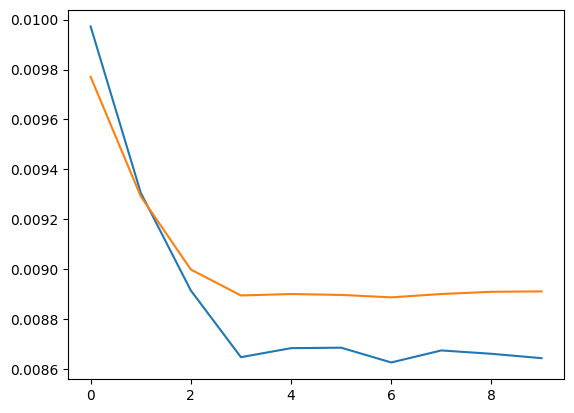

In [60]:
plt.plot([stat_dict['Training Loss'] for stat_dict in training_stats])
plt.plot([stat_dict['Valid. Loss'] for stat_dict in training_stats])

In [61]:
def predict(model, dataloader, device):
    model.eval()
    output = []
    for batch in dataloader:
        batch_inputs, batch_masks, _ = tuple(b.to(device) for b in batch)
        with torch.no_grad():
            output += (model(batch_inputs, batch_masks).view(1,-1).tolist()[0])
    
    return output

In [62]:
output = predict(model, test_dataloader, device)

In [63]:
output_mod = np.reshape(output, (len(test_dataloader.dataset), 9, 11, 11, 7))

In [64]:
output_softmax = nn.functional.softmax(torch.Tensor(output_mod), dim=4)

In [65]:
output_arr = np.asarray(output_softmax)

In [66]:
output_arr_flat = np.reshape(output_arr[0], (9*11*11, 7))
print("id\t\tmin\t\tmax\t\tmean\t\tstd")
for color_id in range(0, 7):
    print(color_id, "\t", output_arr_flat[:,color_id].min(), "\t", output_arr_flat[:,color_id].max(), "\t", output_arr_flat[:,color_id].mean(), "\t", output_arr_flat[:,color_id].std())

id		min		max		mean		std
0 	 0.9951468 	 0.99995303 	 0.99976885 	 0.00033135674
1 	 4.5401043e-06 	 0.0005016003 	 3.6552035e-05 	 4.2993557e-05
2 	 3.4324175e-06 	 0.00041004573 	 3.652764e-05 	 4.123568e-05
3 	 4.8063e-06 	 0.001964719 	 4.4186392e-05 	 0.00010104137
4 	 4.687534e-06 	 0.000671914 	 3.573641e-05 	 4.5104174e-05
5 	 3.693433e-06 	 0.0011835584 	 4.2261046e-05 	 7.7232915e-05
6 	 4.8372663e-06 	 0.0008638266 	 3.5917838e-05 	 4.9721395e-05


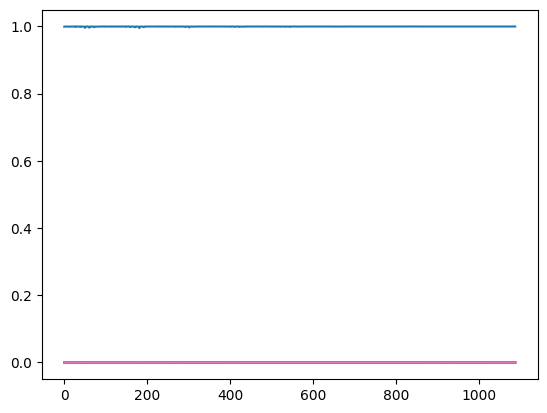

In [67]:
plt.plot(np.reshape(output_arr[0], (9*11*11, 7))[:,])

In [68]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [72]:
scaled_output = scaler.fit_transform(np.reshape(output_arr, (59*9*11*11, 7)))

In [73]:
scaled_output.shape

(64251, 7)

In [75]:
scaled_output = np.reshape(scaled_output, (59, 9, 11, 11, 7))

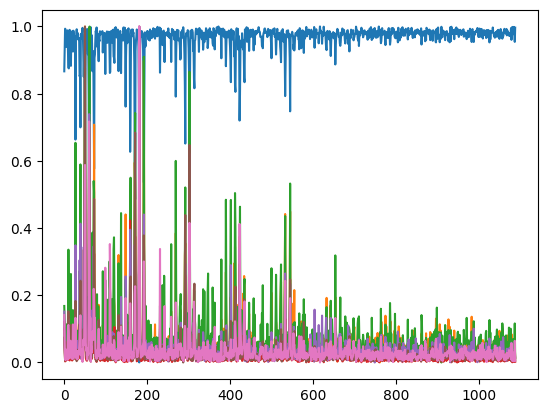

In [76]:
plt.plot(np.reshape(scaled_output[0], (9*11*11, 7))[:,])

In [77]:
np.argmax(np.asarray(output_softmax), 4).shape

(59, 9, 11, 11)

In [78]:
# output_grids = []
# for idx in range(0, len(output), 1089*7):
#     output_grids.append(np.reshape(output[idx:idx+1089*7], (9, 11, 11, 7)))
#     #print(idx, np.nonzero(np.rint(np.reshape(output[idx:idx+1089], (9, 11, 11))).astype(int)))

In [79]:
# output_grids_mod = np.rint((np.array(output_grids)))
# len(output_grids_mod[output_grids_mod > 0])

In [80]:
#scaled_output[:,1] = scaled_output[:,1] * 10

In [81]:
output_grids = np.argmax(np.asarray(scaled_output), 4)

In [82]:
output_grids.shape

(59, 9, 11, 11)

In [84]:
#np.reshape(output_grids, (59, 9, 11, 11, 1))

In [86]:
#np.nonzero(output_grids)

(array([[236., 177.,   0.,  59.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0., 118.,   0., 236., 118.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 236., 236.]]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 3 BarContainer objects>)

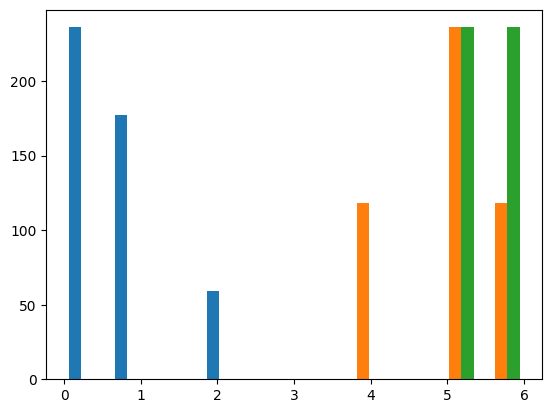

In [87]:
# blokk típusok eloszlása
output_coords_array = np.nonzero(output_grids)[1:]
plt.hist(output_coords_array)

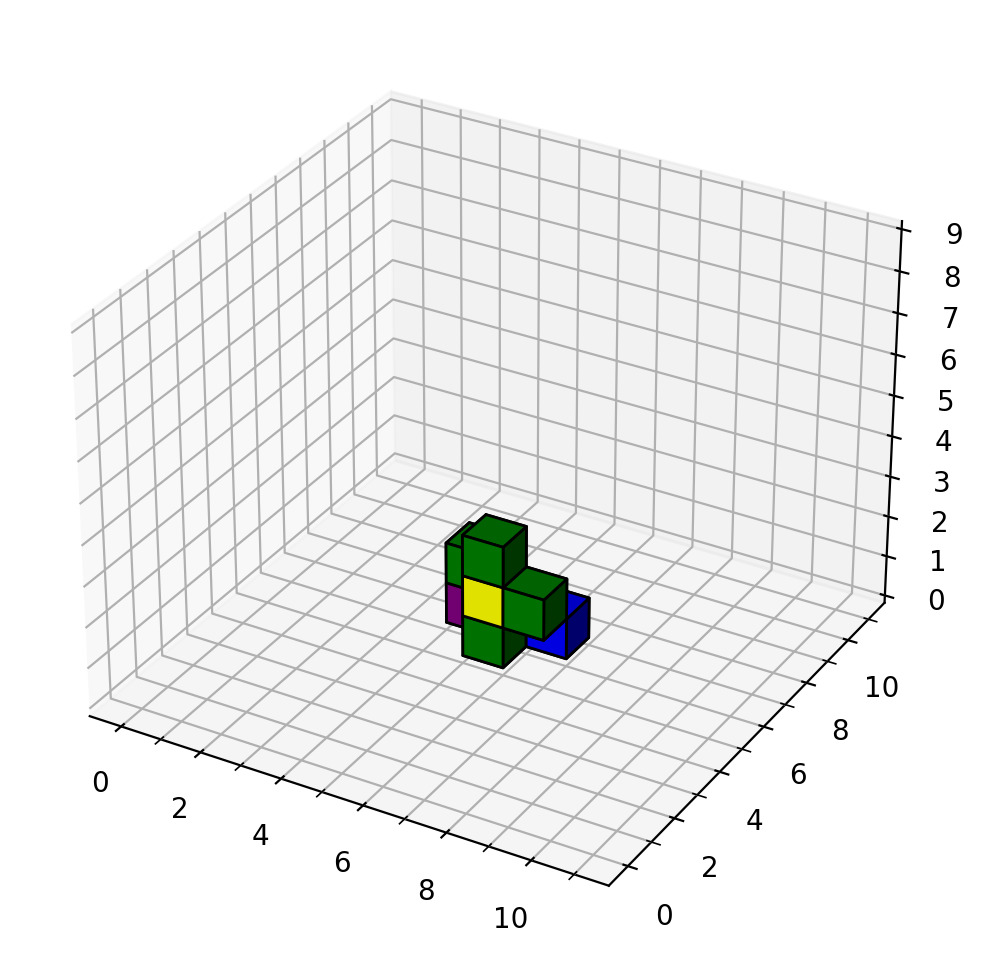

In [89]:
plot = plot_grid(np.abs(output_grids[12].astype(int)))

In [90]:
torch.save(model.state_dict(), "uniform_baseline_col_10_02")

# Evaluation

In [188]:
test_grids_inshape = np.stack(np.argmax(np.reshape(test_labels, (59, 9, 11, 11, 7)), axis=4), axis=0)

In [201]:
total_f1 = []

# Evaluation
# TODO: Needs double checking!
for idx in range(len(test_grids_inshape)):
    synthetic_task = Task('', target_grid=test_grids_inshape[idx])
    argmax = synthetic_task.argmax_intersection(output_grids[idx])
    maximal_intersection = synthetic_task.get_intersection(output_grids[idx], *argmax)
        
    precision = maximal_intersection / (synthetic_task.target_size + 1e-10)
    recall = maximal_intersection / (len(output_grids[idx].nonzero()[0]) + 1e-10)
    f1 = 2 * precision * recall / (precision + recall + 1e-10)
    #print(precision, recall, f1)
    total_f1.append(f1)

print(np.mean(total_f1))

0.07095998459495512
